<a href="https://colab.research.google.com/github/Harsha080996/ML-assignments/blob/master/HW1problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
import math
#Loading the MNIST data and classifying data into test and train set
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
temp = Y_test
input_dim = 784
output_dim = 10
total_classes = 10
batch_size = 8
num_exp = 50
learning_rate=0.005
new_array = []
#Now we need to train and test the model first and then we need to reshape it
X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
#one hot encoding needs to be done to make sure we have 1 for the digit and rest should be 0's in the vector
Y_train = np_utils.to_categorical(Y_train, total_classes)
Y_test = np_utils.to_categorical(Y_test, total_classes)

Using TensorFlow backend.


In [0]:
#We can also train the input digit manually without using keras for which code is written below and it is not used in running of code. Professor said that it was okay
def trainmodel(Y_train):
  a = []
  for i in Y_train:
    b = np.zeros(10)
    b[i] = 1
    a.append(b)
  return a

def testmodel(Y_test):
  b = []
  for i in Y_test:
    c = np.zeros(10)
    c[i] = 1
    b.append(c)
  return b

In [0]:
#Sigmoid function "a = f(z)" is defined which acts as activation function
def sigmoid_function(input): 
  z = 1/(1+np.exp(-input))
  return z

In [0]:
#We need to use above activation function and declare the f(z) value, where z = Wx+b
def main_function(Weights,bias,input):
  result = 1/(1+np.exp(-(np.dot(Weights,np.transpose(input)) + (bias))))
  return result

In [0]:
#We need to use binary cross entropy formula as we need to perform logistic regression using binary cross entropy
def binarycross_entropy(Y_train,result):
  loss = np.sum(np.multiply(np.transpose(Y_train),np.log(result))+np.multiply(np.transpose(Y_train),np.log(result)),axis=1,keepdims=True)/batch_size
  return loss

In [0]:
# I defined all the derivates of loss,Weights, bias, Z value below. These are the predefined formulas
def functions(X_train,Y_train,result,Weights,bias,learning_rate,batch_size): 
  
  diff_loss = result - np.transpose(Y_train)
  diff_zvalue = diff_loss
  diff_Weights = np.dot(diff_zvalue,X_train)
  diff_bias = np.sum(diff_zvalue,axis=1,keepdims=True)
  Weights -= learning_rate*diff_Weights
  bias -= learning_rate*diff_bias
  return Weights,bias

In [7]:
Weights = np.random.randn(10,784)*0.01# values of weights and bias are defined.
bias = np.random.randn(10,1)
for i in range(num_exp):#Training the model by using logistric regression with binary-cross entropy
  for j in range(0, X_train.shape[0], batch_size):
    result = main_function(Weights,bias,X_train[j:j+batch_size])
    Weights,bias = functions(X_train[j:j+batch_size],Y_train[j:j+batch_size],result,Weights,bias,learning_rate,batch_size)
  final = np.transpose(main_function(Weights,bias,X_test))
  new_list = list()
  for k in range(10000): new_list.append(np.argmax(final[k]))
  a = 0 
  for l in range(10000):
    if new_list[l]  == temp[l]:a += 1#calculating the accuracy of the model
  print('Epoch_value : ', i+1)#printing the epoch values
  print('accuracy : ',a*0.01)#printing the accuracy values for 50 random experiments
  new_array.append(a*0.01)

Epoch_value :  1
accuracy :  90.33
Epoch_value :  2
accuracy :  90.81
Epoch_value :  3
accuracy :  91.0
Epoch_value :  4
accuracy :  91.05
Epoch_value :  5
accuracy :  91.06
Epoch_value :  6
accuracy :  91.0
Epoch_value :  7
accuracy :  91.07000000000001
Epoch_value :  8
accuracy :  91.14
Epoch_value :  9
accuracy :  91.13
Epoch_value :  10
accuracy :  91.2
Epoch_value :  11
accuracy :  91.2
Epoch_value :  12
accuracy :  91.21000000000001
Epoch_value :  13
accuracy :  91.24
Epoch_value :  14
accuracy :  91.27
Epoch_value :  15
accuracy :  91.31
Epoch_value :  16
accuracy :  91.3
Epoch_value :  17
accuracy :  91.31
Epoch_value :  18
accuracy :  91.39
Epoch_value :  19
accuracy :  91.39
Epoch_value :  20
accuracy :  91.41
Epoch_value :  21
accuracy :  91.39
Epoch_value :  22
accuracy :  91.4
Epoch_value :  23
accuracy :  91.41
Epoch_value :  24
accuracy :  91.42
Epoch_value :  25
accuracy :  91.41
Epoch_value :  26
accuracy :  91.41
Epoch_value :  27
accuracy :  91.43
Epoch_value :  28
a

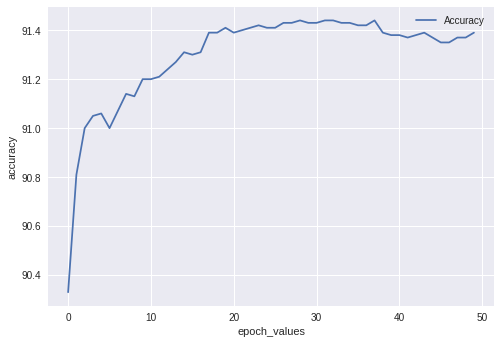

In [8]:
#plotting the accuracy for the above code
plt.plot(new_array, label="Accuracy")
plt.xlabel('epoch_values')
plt.ylabel('accuracy')
plt.legend()